In the first iteration with the Nextflix dataset, the goal was to practice some basic data cleaning. 

The main sections are:

- Introduction to the Kaggle dataset
- Data Cleaning: Nan Values; Dealing with Dates; Lowercase Titles; Multiple Countries
- Questions
- Conclusion

In [1]:
# import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

The link provided to download the Netfix dataset is:
https://www.kaggle.com/shivamb/netflix-shows

In [2]:
df = pd.read_csv('netflix_titles.csv')

In [3]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


# **Introduction to the Kaggle Dataset**



The raw dataset has twelve columns, and 7787 rows (0 to 7786).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


**As per the dataset description:**

- show_id: unique ID for each title, 7787 unique values
- type: movie or tv show
- title: 7787 unique titles
- director: name of the title director
- cast: actors involved
- country: country where the movie or tv show was produced
- date_added: date the title was added to Netflix platform
- release_year: actual title release year
- rating: tv rating of the movie or tv show
- duration: total duration in minutes for movies, and in seasons for tv shows
- listed_in: genre(s)
- description: brief description of the movie or tv show

There are two types of media: 'TV Show' and 'Movie'

In [5]:
df['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

Aggregate information for the 'release year' column shows that the oldest release date is 1925, while the most recent is in 2021. Overall, the mean release date is 2013.

In [6]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


I was curious to see what movie was first released in 1925. It is a collection of restored films made by women. 

In [7]:
df.loc[df['release_year'] == 1925]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4867,s4868,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,"December 30, 2018",1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...


A preview for the TV series is available at:
https://www.youtube.com/watch?v=SfonigTczQ0

Feel free to click on the player embedded below to learn more.

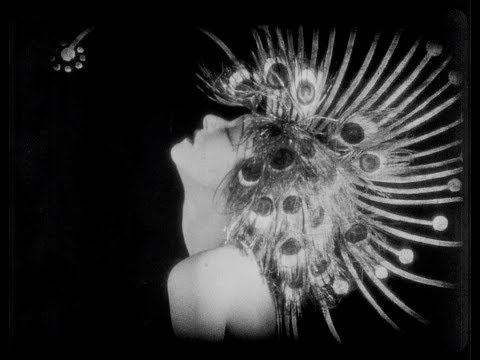

In [8]:
from IPython.display import YouTubeVideo
YouTubeVideo(id="SfonigTczQ0", width="560", height="315" )


# **Data Cleaning**

## **Nan Values**

Here I view the percentage per column of nan values

In [9]:
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        #print("{} null rate: {}%".format(i,round(null_rate,2)))
        print(f"'{i}' percentage of NaN: {round(null_rate,2)}%")

'director' percentage of NaN: 30.68%
'cast' percentage of NaN: 9.22%
'country' percentage of NaN: 6.51%
'date_added' percentage of NaN: 0.13%
'rating' percentage of NaN: 0.09%


If Netflix were my client, I would ask if it were possible to get the missing values. If it isn't, why not? This could help Netflix determine unknown issues in their data collection pipeline.

While I could research the missing values for the 'director', 'cast', 'country' and 'rating' columns, for this first project I've decided to replace these with 'not available' to be able to quickly move on.

In [10]:
df['director'].replace(np.nan, 'not available', inplace=True)
df['cast'].replace(np.nan, 'not available', inplace=True)
df['country'].replace(np.nan, 'not available', inplace=True)
df['rating'].replace(np.nan, 'not available', inplace=True)

Here I view the rows for all NaN values in the 'date_added' column.

In [11]:
# creating bool series True for NaN values in 'date_added'  
date_added_nulls = pd.isnull(df['date_added'])  
      
# rows where 'date_added' = NaN  
df[date_added_nulls]  

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
258,s259,TV Show,A Young Doctor's Notebook and Other Stories,not available,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
549,s550,TV Show,Anthony Bourdain: Parts Unknown,not available,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
2263,s2264,TV Show,Frasier,not available,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
2288,s2289,TV Show,Friends,not available,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
2555,s2556,TV Show,Gunslinger Girl,not available,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
3374,s3375,TV Show,Kikoriki,not available,Igor Dmitriev,not available,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
3492,s3493,TV Show,La Familia P. Luche,not available,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
3946,s3947,TV Show,Maron,not available,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
5137,s5138,TV Show,Red vs. Blue,not available,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6065,s6066,TV Show,The Adventures of Figaro Pho,not available,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In order to plot the number of shows/movies released per year, it is essential that the type of this column be changed to datetime. These ten rows account for approximately 0.13% (see above) of the total dataset. Dropping them should not overly skew my results.

In [12]:
df = df.dropna().reset_index(drop=True)

The df now has 7777 rows, with no non-nulls.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7777 entries, 0 to 7776
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7777 non-null   object
 1   type          7777 non-null   object
 2   title         7777 non-null   object
 3   director      7777 non-null   object
 4   cast          7777 non-null   object
 5   country       7777 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7777 non-null   int64 
 8   rating        7777 non-null   object
 9   duration      7777 non-null   object
 10  listed_in     7777 non-null   object
 11  description   7777 non-null   object
dtypes: int64(1), object(11)
memory usage: 729.2+ KB


## **Dealing with dates**

Now that all NaN values have been taken care of, here I change the 'date_added' column type to datetime.

In [14]:
df['date_added'] = pd.to_datetime(df['date_added'])

Next, I create 'year_added' and 'month_added' columns, to be able to eventually plot the count of added shows and movies.

In [15]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

## **Lowercase Titles**

To uniform the titles, I lowercase them all.

In [16]:
df['title'] = df['title'].str.lower()

## **Multiple countries**

I now need to decide what to do with 'country' instances for co-productions.

For example, for "zz top: that little ol' band from texas".

In [18]:
df.tail(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
7776,s7787,Movie,zz top: that little ol' band from texas,Sam Dunn,not available,"United Kingdom, Canada, United States",2020-03-01,2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...,2020,3


I've decided that each individual country should be counted as a distinct instance where the tv show or movie are co-produced. But I had a hard time figuring out how to duplicate rows based on values separated by commas in the 'country' column.

I researched in the Pandas documentation and also in Stack Overflow. After seeing a post that partially addressed the issue, I posted my own follow up question at:

https://stackoverflow.com/questions/66450416/duplicating-rows-by-splitting-comma-separated-multiple-values-in-another-column/66450614#66450614

It was amazing how quickly I got answers from two users! Below is the adapted code in action.

In [19]:
df['country'] = df['country'].str.split(', ')
df_countries = (
    df.explode('country')
    .reset_index(drop=False)
)

In this new df 'df_countries', one can now see the individual countries separated by row (United Kingdom, Canada, and the United States) for "zz top: that little ol' band from texas".

In [20]:
df_countries.tail(3)

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
9557,7776,s7787,Movie,zz top: that little ol' band from texas,Sam Dunn,not available,United Kingdom,2020-03-01,2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...,2020,3
9558,7776,s7787,Movie,zz top: that little ol' band from texas,Sam Dunn,not available,Canada,2020-03-01,2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...,2020,3
9559,7776,s7787,Movie,zz top: that little ol' band from texas,Sam Dunn,not available,United States,2020-03-01,2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...,2020,3


Taking a look at the countries, I notice some have an extra comma. Also, East Germany and West Germany need to be combined to Germany.

In [21]:
df_countries['country'].unique()

array(['Brazil', 'Mexico', 'Singapore', 'United States', 'Turkey',
       'Egypt', 'India', 'Poland', 'Thailand', 'Nigeria', 'not available',
       'Norway', 'Iceland', 'United Kingdom', 'Japan', 'South Korea',
       'Italy', 'Canada', 'Indonesia', 'Romania', 'Spain', 'South Africa',
       'France', 'Portugal', 'Hong Kong', 'China', 'Germany', 'Argentina',
       'Serbia', 'Denmark', 'Kenya', 'New Zealand', 'Pakistan',
       'Australia', 'Taiwan', 'Netherlands', 'Philippines',
       'United Arab Emirates', 'Iran', 'Belgium', 'Israel', 'Uruguay',
       'Bulgaria', 'Chile', 'Russia', 'Mauritius', 'Lebanon', 'Colombia',
       'Algeria', 'Soviet Union', 'Sweden', 'Malaysia', 'Ireland',
       'Luxembourg', 'Finland', 'Austria', 'Peru', 'Senegal',
       'Switzerland', 'Ghana', 'Saudi Arabia', 'Armenia', 'Jordan',
       'Mongolia', 'Namibia', 'Qatar', 'Vietnam', 'Syria', 'Kuwait',
       'Malta', 'Czech Republic', 'Bahamas', 'Sri Lanka',
       'Cayman Islands', 'Bangladesh', 'Unite

In [22]:
df_countries['country'].replace('Cambodia,', 'Cambodia', inplace=True)
df_countries['country'].replace('West Germany', 'Germany', inplace=True)
df_countries['country'].replace('United Kingdom,', 'United Kingdom', inplace=True)
df_countries['country'].replace('East Germany', 'Germany', inplace=True)

df_countries has 9560 rows, due to co-produced titles having duplicates.

Depending on the question, I will use df when there is no need to take into account distinct countries oof co-productions. When these distinct countries do matter, I will use df_countries.

In [23]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9560 entries, 0 to 9559
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         9560 non-null   int64         
 1   show_id       9560 non-null   object        
 2   type          9560 non-null   object        
 3   title         9560 non-null   object        
 4   director      9560 non-null   object        
 5   cast          9560 non-null   object        
 6   country       9560 non-null   object        
 7   date_added    9560 non-null   datetime64[ns]
 8   release_year  9560 non-null   int64         
 9   rating        9560 non-null   object        
 10  duration      9560 non-null   object        
 11  listed_in     9560 non-null   object        
 12  description   9560 non-null   object        
 13  year_added    9560 non-null   int64         
 14  month_added   9560 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object

# **Questions**

## **How many unique countries are in the dataFrame?**

I use df_countries to answer this question so that each country can appear individually. There are 118 unique countries.

In [24]:
len(df_countries['country'].unique())

118

**Insights:**
The content on Netflix comes from a range that is quite international.

## **What are the 10 top production countries?**

The top 10 countries are listed below.

In [25]:
df_countries['country'].value_counts().nlargest(10)

United States     3290
India              990
United Kingdom     722
not available      506
Canada             412
France             349
Japan              286
Spain              215
South Korea        212
Germany            205
Name: country, dtype: int64

**Insights:** 

The Unites States is in first place, which is not surprisingly since Netflix began in the United States.

Second place goes to India, which demonstrates the entertainment influence of Bollywood on Netflix.

Third place goes to the United Kingdom. It will be interesting to see how the production ranks change over time.

The fourth spot is "not available". I would highlight this to Netflix to determine the reason for the lack of information.

## **What are the counts for tv show and movie?**


Since co-production is not an issue, I use the main df to avoid duplications. 

There are 5377 movies and 2400 tv shows.

In [26]:
df['type'].value_counts()

Movie      5377
TV Show    2400
Name: type, dtype: int64

**Insights:** 
It would seem there are many more movies than tv shows.

I visualize this in a countplot:

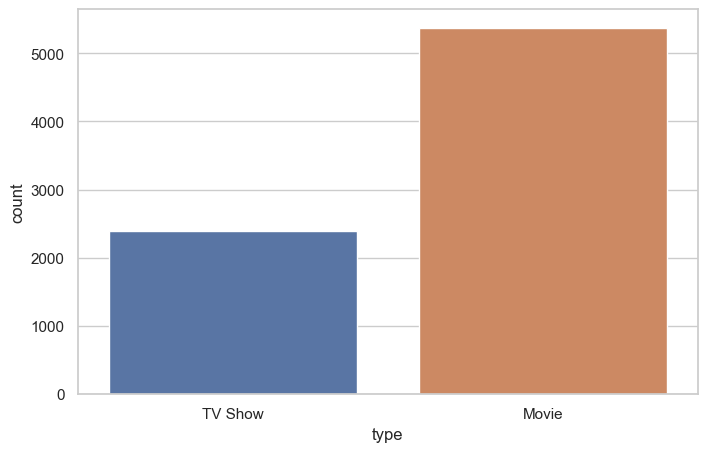

In [27]:
sns.set(style='whitegrid')
plt.figure(figsize=(8,5))
sns.countplot(x='type', data=df)
plt.show()

But is this a fair comparaison? The durations for movies are in minutes, while it is in seasons for tv shows.

In [28]:
(df['duration'].unique())

array(['4 Seasons', '93 min', '78 min', '80 min', '123 min', '1 Season',
       '95 min', '119 min', '118 min', '143 min', '103 min', '89 min',
       '91 min', '149 min', '144 min', '124 min', '87 min', '110 min',
       '128 min', '117 min', '100 min', '2 Seasons', '84 min', '99 min',
       '90 min', '102 min', '104 min', '105 min', '56 min', '125 min',
       '81 min', '97 min', '106 min', '107 min', '109 min', '44 min',
       '75 min', '101 min', '3 Seasons', '37 min', '113 min', '114 min',
       '130 min', '94 min', '140 min', '135 min', '82 min', '70 min',
       '121 min', '92 min', '164 min', '53 min', '83 min', '116 min',
       '86 min', '120 min', '96 min', '126 min', '129 min', '77 min',
       '137 min', '148 min', '28 min', '122 min', '176 min', '85 min',
       '22 min', '68 min', '111 min', '29 min', '142 min', '168 min',
       '21 min', '59 min', '20 min', '98 min', '108 min', '76 min',
       '26 min', '156 min', '30 min', '57 min', '150 min', '133 min',
       '1

In terms of actual time, tv shows could surpass movies. If the question were in terms of type duration, the 'duration' column would have to be standardized to total minutes for both types. Counting the total number of episodes versus movies would also have resulted in there being more shows than movies.

**Focusing on South America**

Since no South American country made the top ten, I decide to focus the following questions in that region.

As per https://en.wikipedia.org/wiki/South_America#Countries_and_territories, there are 16 countries in South America.

I have removed Bouvet Island because the population is zero. South Georgia and the South Sandwich Islands were removed because there are no permanent populations there.

The 14 remaining countries are: 'Argentina', 'Bolivia' 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Falkland Islands', 'French Guiana', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'

I use these as filters to create df_south_america.

In [29]:
df_south_america = df_countries[df_countries['country'].isin(['Argentina', 'Bolivia', 'Brazil', 'Chile',
                            'Colombia', 'Ecuador', 'Falkland Islands',
                            'French Guiana', 'Guyana', 'Paraguay', 'Peru',
                            'Suriname', 'Uruguay', 'Venezuela'])]

In [30]:
df_south_america.head(3)

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,0,s1,TV Show,3%,not available,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
103,92,s93,Movie,"27, el club de los malditos",Nicanor Loreti,"Diego Capusotto, Sofía Gala, Daniel Aráoz, Wil...",Argentina,2018-05-01,2018,TV-MA,82 min,"Action & Adventure, Comedies, International Mo...",After a musician dies under suspicious circums...,2018,5
225,194,s195,Movie,a life of speed: the juan manuel fangio story,Francisco Macri,not available,Argentina,2020-03-20,2020,TV-14,93 min,"Documentaries, International Movies, Sports Mo...","Juan Manuel Fangio was the Formula One king, w...",2020,3


There are now 270 non-null rows, with a total of 15 columns.

In [31]:
df_south_america.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 0 to 9518
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index         270 non-null    int64         
 1   show_id       270 non-null    object        
 2   type          270 non-null    object        
 3   title         270 non-null    object        
 4   director      270 non-null    object        
 5   cast          270 non-null    object        
 6   country       270 non-null    object        
 7   date_added    270 non-null    datetime64[ns]
 8   release_year  270 non-null    int64         
 9   rating        270 non-null    object        
 10  duration      270 non-null    object        
 11  listed_in     270 non-null    object        
 12  description   270 non-null    object        
 13  year_added    270 non-null    int64         
 14  month_added   270 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(

## **Do countries in South America also produce more movies than tv shows?**

I use a countplot to quickly answer this question. 

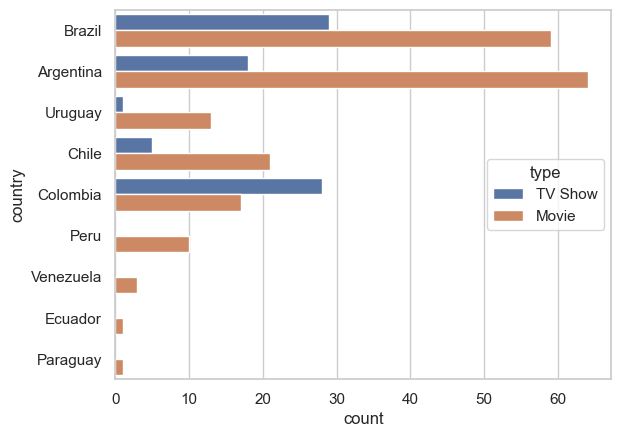

In [32]:
sns.countplot(y="country", hue="type", data=df_south_america)
#plt.legend()
plt.show()

**Insights:**

Of the nine South American countries on Netflix, only Columbia has more TV Shows available than movies. Does this reflect an overall trend in Columbia, where more tv shows than movies are produced? Or is this seen only on the Netflix platform?

## **How did the adding of movies and tv shows to the Netflix platform change over time in South America?**

I compare the general year_added info for all countries to countries only in South America.

In [33]:
print("year_added info for overall netflix df_countries")
print(df_countries['year_added'].describe())
print("\nyear_added info for South America countries only")
print(df_south_america['year_added'].describe())

year_added info for overall netflix df_countries
count    9560.000000
mean     2018.480335
std         1.396359
min      2008.000000
25%      2018.000000
50%      2019.000000
75%      2020.000000
max      2021.000000
Name: year_added, dtype: float64

year_added info for South America countries only
count     270.000000
mean     2018.411111
std         1.209268
min      2014.000000
25%      2018.000000
50%      2018.000000
75%      2019.000000
max      2021.000000
Name: year_added, dtype: float64


**Insight:**
The first titles appeared on Netflix in 2008. Titles from South America started being added in 2014.

Here I plot tv shows vs movies in South America.

In [34]:
tv_shows = df_south_america[df_south_america['type'] == 'TV Show']
movies = df_south_america[df_south_america['type'] == 'Movie']

In [35]:
tv_shows_progress = tv_shows['year_added'].value_counts().sort_index()
movies_progress = movies['year_added'].value_counts().sort_index()

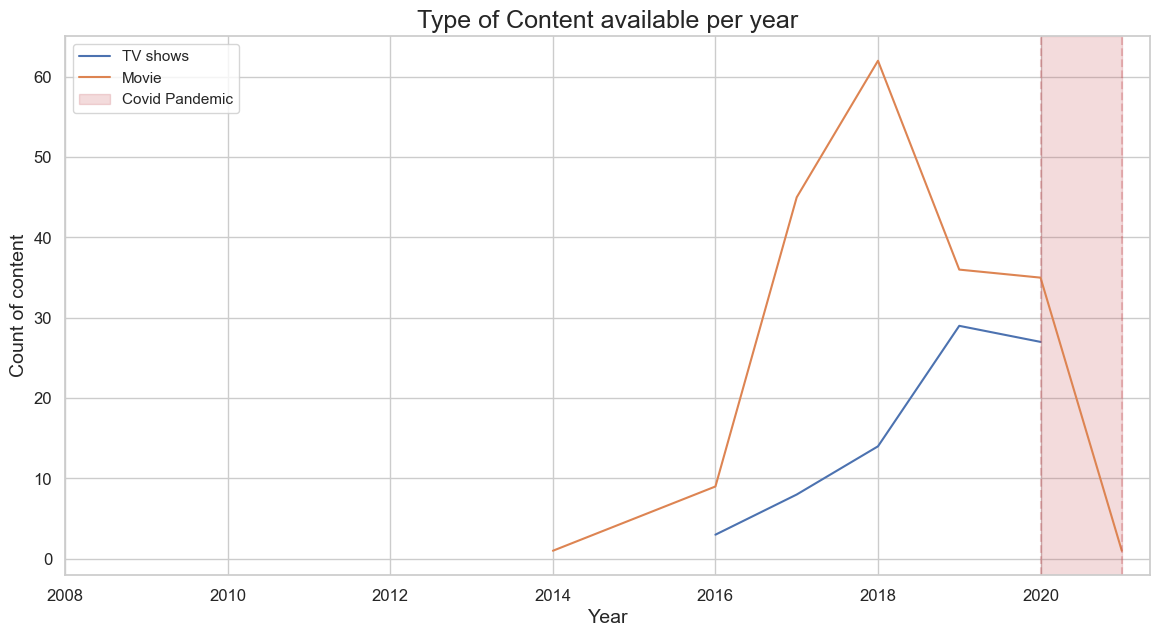

In [36]:
plt.figure(figsize=(14, 7))

plt.plot(tv_shows_progress.index, tv_shows_progress.values, label='TV shows')
plt.plot(movies_progress.index, movies_progress.values, label='Movie')

# shaded area for covid pandemic
plt.axvline(2020, alpha=0.3, linestyle='--', color='r')
plt.axvline(2021, alpha=0.3, linestyle='--', color='r')
plt.axvspan(2020, 2021, alpha=0.2, color='r', label='Covid Pandemic')

plt.xticks(list(range(2008, 2021, 2)), fontsize=12)
plt.title('Type of Content available per year', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count of content', fontsize=14)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

**Insights:**
Movies produced by South American countries started being added to Netflix in 2014. Shows started being added as of 2016.

The number of movies peeked in 2018 at just over 60, then experienced a sharp declined that stabilized in 2019. Then there was another sharp drop in 2020, during the covid pandemic.

Tv shows saw a steady increase until around 2019. No new shows were added in 2020. 

## **Who directed the most available titles on Netflix?**

I will use the overall df.

Because the original dataset had so many null values, I first have to filter out all the rows with 'not avaialble' in the 'director' column.

In [37]:
df_directors = df.loc[
    (df.director != 'not available')
]

In [38]:
top_three = (
    df_directors.groupby('director')
       .count()
    .nlargest(3, 'show_id')
)

top_three

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
director,,,,,,,,,,,,,
"Raúl Campos, Jan Suter",18,18,18,18,18,18,18,18,18,18,18,18,18
Marcus Raboy,16,16,16,16,16,16,16,16,16,16,16,16,16
Jay Karas,14,14,14,14,14,14,14,14,14,14,14,14,14


**Insights:**
The three top spots go to:
- the duo Raúl Campos and Jan Suter, 
- followed by Markus Raboy,
- and then Jay Karas.

## **What are the most common rating and genres for the top directors?**

I would like to better understand the relationship between the top directors and ratings/genre. To answer this, I decided to grab the rows of each top director.

At number one with 18 titles (see above), Raúl Campos and Jan Suter specialize in TV-MA stand-up comedy. Their movies have been produced by Argentina, Chile, Columbia and Mexico.

In [39]:
df_directors.loc[
    (df_directors.director == 'Raúl Campos, Jan Suter')
]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
369,s371,Movie,alan saldaña: mi vida de pobre,"Raúl Campos, Jan Suter",Alan Saldaña,[Mexico],2017-08-04,2017,TV-MA,54 min,Stand-Up Comedy,Mexican comic Alan Saldaña has fun with everyt...,2017,8
566,s569,Movie,arango y sanint: ríase el show,"Raúl Campos, Jan Suter","Julián Arango, Antonio Sanint",[Colombia],2018-01-17,2018,TV-MA,62 min,Stand-Up Comedy,Colombian stand-up comedians Antonio Sanint an...,2018,1
1218,s1221,Movie,carlos ballarta: furia ñera,"Raúl Campos, Jan Suter",Carlos Ballarta,[Mexico],2018-05-11,2018,TV-MA,63 min,Stand-Up Comedy,Mexican comic Carlos Ballarta mocks himself an...,2018,5
1441,s1444,Movie,coco y raulito: carrusel de ternura,"Raúl Campos, Jan Suter","Coco Celis, Raúl Meneses",[Mexico],2018-07-27,2018,TV-MA,57 min,Stand-Up Comedy,"A study in contrasts, comedy partners and good...",2018,7
1600,s1603,Movie,daniel sosa: sosafado,"Raúl Campos, Jan Suter",Daniel Sosa,[Mexico],2017-02-03,2017,TV-MA,78 min,Stand-Up Comedy,Comedian Daniel Sosa inhabits various characte...,2017,2
2146,s2149,Movie,fernando sanjiao: hombre,"Raúl Campos, Jan Suter",Fernando Sanjiao,[Argentina],2018-05-25,2018,TV-MA,63 min,Stand-Up Comedy,Argentine actor and comedian Fernando Sanjiao ...,2018,5
3118,s3124,Movie,jani dueñas: grandes fracasos de ayer y hoy,"Raúl Campos, Jan Suter",Jani Dueñas,[Chile],2018-06-29,2018,TV-MA,77 min,Stand-Up Comedy,Chilean comedian and personality Jani Dueñas p...,2018,6
3798,s3806,Movie,luciano mellera: infantiloide,"Raúl Campos, Jan Suter",Luciano Mellera,[Argentina],2018-07-06,2018,TV-14,66 min,Stand-Up Comedy,Argentina's Luciano Mellera emphasizes the hum...,2018,7
3878,s3886,Movie,malena pichot: estupidez compleja,"Raúl Campos, Jan Suter",Malena Pichot,[Argentina],2018-03-02,2018,TV-MA,51 min,Stand-Up Comedy,An Argentine comedian espouses the values of f...,2018,3
3997,s4006,Movie,mea culpa,"Raúl Campos, Jan Suter",Alexis de Anda,[Mexico],2017-11-10,2017,TV-MA,54 min,Stand-Up Comedy,"Raw and outspoken, comedian Alexis de Anda bar...",2017,11


In second place with 16 titles, Marcus Raboy specializes in TV-MA stand up comedy, produced by the United States. All except one title are movies.

In [40]:
df_directors.loc[
    (df_directors.director == 'Marcus Raboy')
]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
548,s551,Movie,anthony jeselnik: fire in the maternity ward,Marcus Raboy,Anthony Jeselnik,[United States],2019-04-30,2019,TV-MA,64 min,Stand-Up Comedy,"Forging his own comedic boundaries, Anthony Je...",2019,4
1541,s1544,Movie,cristela alonzo: lower classy,Marcus Raboy,Cristela Alonzo,[United States],2017-01-24,2017,TV-MA,67 min,Stand-Up Comedy,The irrepressible Alonzo skewers Latino stereo...,2017,1
1583,s1586,Movie,"dana carvey: straight white male, 60",Marcus Raboy,Dana Carvey,[United States],2016-11-04,2016,TV-MA,64 min,Stand-Up Comedy,Emmy-winning comedian Dana Carvey blends pitch...,2016,11
1703,s1706,Movie,deray davis: how to act black,Marcus Raboy,DeRay Davis,[United States],2017-11-14,2017,TV-MA,66 min,Stand-Up Comedy,Dynamic comic DeRay Davis hits the stage like ...,2017,11
3226,s3232,Movie,judd apatow: the return,Marcus Raboy,Judd Apatow,[United States],2017-12-12,2017,TV-MA,70 min,Stand-Up Comedy,Judd Apatow returns to stand-up comedy after 2...,2017,12
3318,s3324,Movie,katt williams: kattpacalypse,Marcus Raboy,Katt Williams,[United States],2018-07-03,2012,TV-MA,61 min,Stand-Up Comedy,Urban comic Katt Williams ushers in Kattpacaly...,2018,7
3821,s3829,Movie,lynne koplitz: hormonal beast,Marcus Raboy,Lynne Koplitz,[United States],2017-08-22,2017,TV-MA,51 min,Stand-Up Comedy,Unabashed comedian Lynne Koplitz offers a woma...,2017,8
3938,s3946,Movie,marlon wayans: woke-ish,Marcus Raboy,Marlon Wayans,[United States],2018-02-27,2018,TV-MA,67 min,Stand-Up Comedy,"Rollicking, outrageous and audacious, Marlon W...",2018,2
4116,s4125,Movie,miranda sings live…your welcome,Marcus Raboy,Colleen Ballinger,[United States],2019-06-04,2019,TV-14,62 min,Stand-Up Comedy,Viral video star Miranda Sings and her real-wo...,2019,6
4789,s4798,TV Show,patton oswalt: i love everything,Marcus Raboy,"Patton Oswalt, Bob Rubin",[United States],2020-05-19,2020,TV-MA,1 Season,"Stand-Up Comedy & Talk Shows, TV Comedies",Turning 50. Finding love again. Buying a house...,2020,5


In third place with 14 movies, Jay Karas also mostly specilizes in TV-MA stand-up comedy, produced in the United States.

In [41]:
df_directors.loc[
    (df_directors.director == 'Jay Karas')
]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
304,s306,Movie,adam devine: best time of our lives,Jay Karas,Adam Devine,[United States],2019-06-18,2019,TV-MA,59 min,Stand-Up Comedy,Frenetic comic Adam Devine talks teen awkwardn...,2019,6
385,s387,Movie,ali wong: baby cobra,Jay Karas,Ali Wong,[United States],2016-05-06,2016,TV-MA,60 min,Stand-Up Comedy,Ali Wong's stand up special delves into her se...,2016,5
386,s388,Movie,ali wong: hard knock wife,Jay Karas,Ali Wong,[United States],2018-05-13,2018,TV-MA,64 min,Stand-Up Comedy,"Two years after the hit ""Baby Cobra,"" Ali Wong...",2018,5
534,s536,Movie,anjelah johnson: not fancy,Jay Karas,Anjelah Johnson-Reyes,[United States],2015-10-02,2015,TV-14,64 min,Stand-Up Comedy,"The actress, comedian and YouTube sensation ri...",2015,10
912,s915,Movie,bill burr: i'm sorry you feel that way,Jay Karas,Bill Burr,[United States],2014-12-05,2014,TV-MA,81 min,Stand-Up Comedy,"Bill Burr escapes the zombie apocalypse, explo...",2014,12
915,s918,Movie,bill burr: walk your way out,Jay Karas,Bill Burr,[United States],2017-01-31,2017,TV-MA,78 min,Stand-Up Comedy,No-nonsense comic Bill Burr takes the stage in...,2017,1
916,s919,Movie,bill burr: you people are all the same,Jay Karas,Bill Burr,[United States],2018-06-30,2012,TV-MA,69 min,Stand-Up Comedy,Funnyman Bill Burr takes the stage to uncork a...,2018,6
1358,s1361,Movie,christina p: mother inferior,Jay Karas,Christina Pazsitzky,[United States],2017-10-10,2017,TV-MA,59 min,Stand-Up Comedy,Christina Pazsitzky hits Seattle with a biting...,2017,10
1694,s1697,Movie,demetri martin: live (at the time),Jay Karas,Demetri Martin,[United States],2015-08-14,2015,TV-MA,62 min,Stand-Up Comedy,Demetri Martin brings his off-kilter take on a...,2015,8
3136,s3142,Movie,jeff foxworthy and larry the cable guy: we’ve ...,Jay Karas,"Jeff Foxworthy, Larry the Cable Guy",[United States],2016-08-26,2016,TV-14,75 min,Stand-Up Comedy,Grammy-nominated comedians Jeff Foxworthy and ...,2016,8


**Insights:**
It is clear that movies with a TV-MA rating and listed as stand up comedy dominate the top three directors' works.

# **CONCLUSION**

This project on the Netflix dataset has taught me some basics on data cleaning. For example: NaNs, changing to datetime, multiple values separated by commas, and filtering to concentrate on a specific region or exclude certain values. I hope to learn more about data cleaning best practices to become more efficient.

Here are general insights:

1/ In a real-world setting, trying to explain the reasons for missing values could improve future datasets.

2/ In terms of count, there are more movies than tv shows, both when focusing in South America, and on a global level. However, given that tv shows can have multiple episodes per season, there are probably many more individual episodes than movies. A Tv show also probably has a higher total run time (duration) than a movie. However, this cannot be confirmed because of the way the dataset is constructed.

2/ The top director spot goes to co-directors whose work is produced by South American countries.

3/ Stand-up/TV-MA movies make up almost exclusively the work of the three top spots for director.

In future projects, I hope to have better visualization skills and add ratings from IMDB or Rotten Tomatoes.